# Evaluation of methods for converting enthalpy to temperature: bismuth
In this notebook the results of the evaluation are reported for **bismuth**. 

Refer to the _enthalpy2temperature.ipynb_ notebook for the complete description of the procedure adopted.

## Application and comparison

In [1]:
from temp_from_h import newton_method, lbh15_method, table_method, poly_method
from time_and_accuracy import eval_time, eval_accuracy, table_method_summary, \
    get_poly_results
from plots import plot_table_evaluation, plot_polynomium_results, \
    plot_accuracy_comparison
from _commons import DB_SIZES, T_IN
import numpy as np 
from dassh import Material
from tabulate import tabulate
import os


MATERIAL: str = 'bismuth'
"""Material to be used"""
DB_PATH_PREFIX: str = f"{MATERIAL}_"
"""Prefix for the path to the data files"""
DB_PATH_SUFFIX: str = ".csv"
"""Suffix for the path to the data files"""
DATA_FOLDER: str = os.path.join('data', MATERIAL)
"""Folder containing the data files"""
reference = np.genfromtxt(os.path.join(DATA_FOLDER, f'{MATERIAL}_ref.csv'), 
                          delimiter=',')
coolant = Material(MATERIAL, T_IN)

## TAB method analysis

In [2]:
results_table = {}
for s in DB_SIZES[MATERIAL]:
    path = DB_PATH_PREFIX + str(s) + DB_PATH_SUFFIX
    data_path = os.path.join(DATA_FOLDER, path)
    results_table[s] = table_method_summary(reference, data_path)

Below the resulting accuracy and time effort for `table_method`:

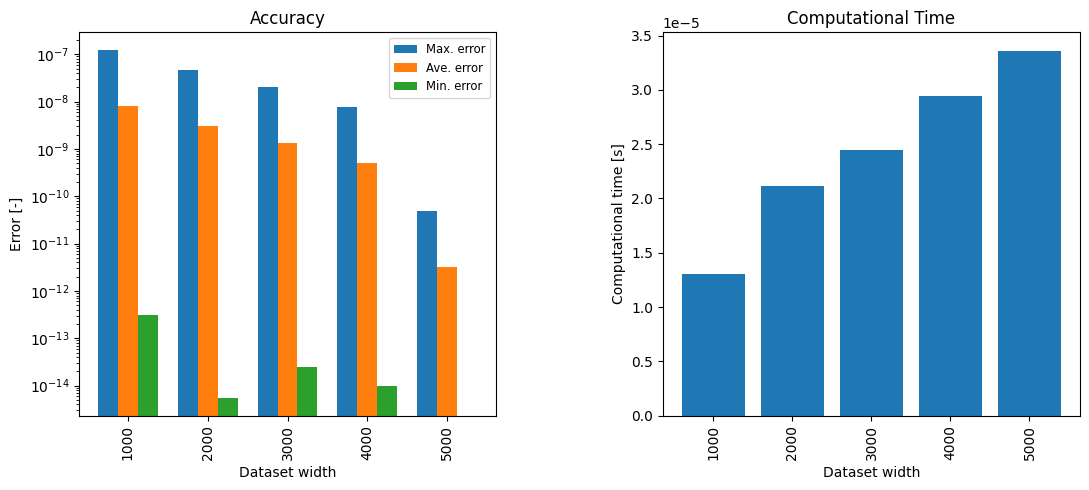

In [3]:
plot_table_evaluation(results_table, MATERIAL)

As expected, the largest dataset (5000 data) provides the best accuracy: the time effort is comparable with that required for managing smaller datasets. Then, this dataset will be hereafter used in the _TAB_ method. 

## Fitting polynomial

Using data file: data/bismuth/bismuth_5000.csv
Evaluating polynomium degree 1...
Evaluating polynomium degree 2...
Evaluating polynomium degree 3...
Evaluating polynomium degree 4...
Evaluating polynomium degree 5...
Evaluating polynomium degree 6...
Evaluating polynomium degree 7...
Evaluating polynomium degree 8...
Evaluating polynomium degree 9...
Evaluating polynomium degree 10...
Evaluating polynomium degree 11...
Evaluating polynomium degree 12...
Evaluating polynomium degree 13...


/home/fpepe/programs/dassh_nc/enthalpy_to_temperature/time_and_accuracy.py:259: RankWarning: Polyfit may be poorly conditioned
  coeffs_T2h = np.polyfit(data[:,0], data[:,1], deg=dd)
/home/fpepe/programs/dassh_nc/enthalpy_to_temperature/time_and_accuracy.py:259: RankWarning: Polyfit may be poorly conditioned
  coeffs_T2h = np.polyfit(data[:,0], data[:,1], deg=dd)


Evaluating polynomium degree 14...
Evaluating polynomium degree 15...


/home/fpepe/programs/dassh_nc/enthalpy_to_temperature/time_and_accuracy.py:259: RankWarning: Polyfit may be poorly conditioned
  coeffs_T2h = np.polyfit(data[:,0], data[:,1], deg=dd)
/home/fpepe/programs/dassh_nc/enthalpy_to_temperature/time_and_accuracy.py:259: RankWarning: Polyfit may be poorly conditioned
  coeffs_T2h = np.polyfit(data[:,0], data[:,1], deg=dd)


Evaluating polynomium degree 16...
Evaluating polynomium degree 17...


/home/fpepe/programs/dassh_nc/enthalpy_to_temperature/time_and_accuracy.py:259: RankWarning: Polyfit may be poorly conditioned
  coeffs_T2h = np.polyfit(data[:,0], data[:,1], deg=dd)
/home/fpepe/programs/dassh_nc/enthalpy_to_temperature/time_and_accuracy.py:260: RankWarning: Polyfit may be poorly conditioned
  coeffs_h2T = np.polyfit(data[:,1], data[:,0], deg=dd)


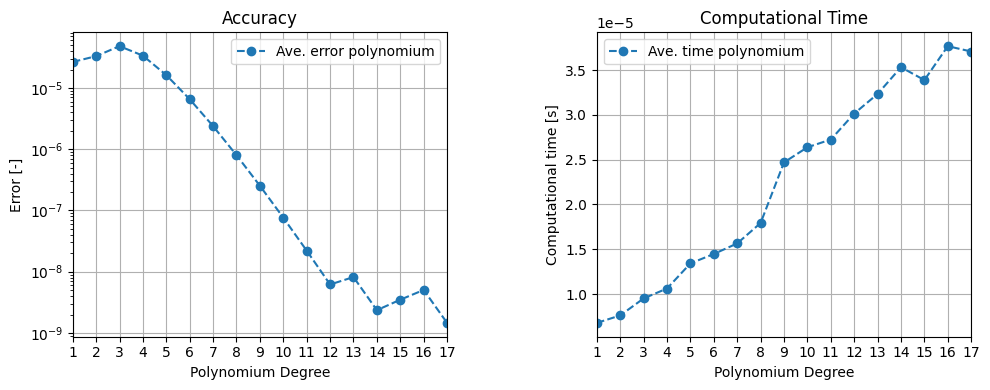

In [4]:
data_path = DB_PATH_PREFIX + str(DB_SIZES[MATERIAL][-1]) + DB_PATH_SUFFIX
data_path = os.path.join(DATA_FOLDER, data_path)
print(f"Using data file: {data_path}")
data = np.genfromtxt(data_path, delimiter=',')

poly_results = get_poly_results(reference, data)

plot_polynomium_results(poly_results, MATERIAL)

_NumPy_ issues a _RankWarning_ for polynomials of degree >= 13. As a consequence, the $12^{th}$ degree polynomial is hereafter considered as the most accurate and reliable.

## Time effort

In [6]:

table = [["Newton", eval_time(newton_method, coolant=coolant)],
         ["lbh15", eval_time(lbh15_method, coolant=coolant)],
         ["Table", results_table[DB_SIZES[MATERIAL][-1]]['time']],
         ["Polynomium (12 deg)", poly_results['time_poly'][11]]]

print(tabulate(table, headers=["Method", "Computational effort [s]"], 
               tablefmt="github"))

| Method              |   Computational effort [s] |
|---------------------|----------------------------|
| Newton              |                0.000284358 |
| lbh15               |                0.00570872  |
| Table               |                3.36201e-05 |
| Polynomium (12 deg) |                3.01402e-05 |


## Accuracy evaluation

Temperature 950.1902380476095 K is above the validity range of thermal_conductivity for bismuth: 950.0 K
Temperature 950.4398879775955 K is above the validity range of thermal_conductivity for bismuth: 950.0 K
Temperature 950.6895379075816 K is above the validity range of thermal_conductivity for bismuth: 950.0 K
Temperature 950.9391878375675 K is above the validity range of thermal_conductivity for bismuth: 950.0 K
Temperature 951.1888377675534 K is above the validity range of thermal_conductivity for bismuth: 950.0 K
Temperature 951.4384876975395 K is above the validity range of thermal_conductivity for bismuth: 950.0 K
Temperature 951.6881376275255 K is above the validity range of thermal_conductivity for bismuth: 950.0 K
Temperature 951.9377875575115 K is above the validity range of thermal_conductivity for bismuth: 950.0 K
Temperature 952.1874374874975 K is above the validity range of thermal_conductivity for bismuth: 950.0 K
Temperature 952.4370874174836 K is above the validity r

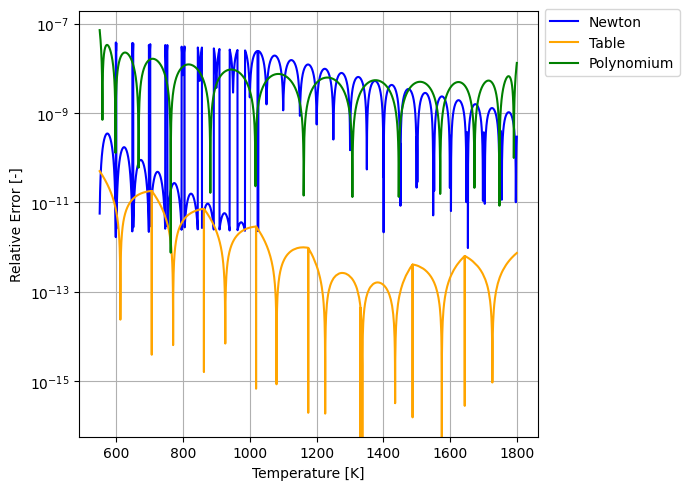

In [7]:
err_newton = eval_accuracy(newton_method, reference, coolant=coolant)
err_table = eval_accuracy(table_method, reference, data_path=data_path)
err_poly = eval_accuracy(poly_method, reference, 
                           coeffs_T2h=np.polyfit(data[:,0], data[:,1], deg=12), 
                           coeffs_h2T=np.polyfit(data[:,1], data[:,0], deg=12))
plot_accuracy_comparison(reference, err_newton, err_table, err_poly, MATERIAL)

# Conclusions

The following methods for converting enthalpy to temperature were compared: _NEW_, _lbh15_, _TAB_ (based on the _NumPy_ function `interp`), and _POLY_ (based on the _NumPy_ functions `polyfit` and `polyval`). Both time effort and accuracy were evaluated.

Accuracy was assessed against a reference dataset of 5000 points calculated using _lbh15_.

_NEW_ and _lbh15_ methods are the most computationally expensive. _TAB_ provides the greatest accuracy (particularly when compared to _NEW_ method).

Although _TAB_ is more accurate than _POLY_ (with maximum errors of the order of $10^{-11}$ and $10^{-7}$, respectively), the latter is slightly faster. Considering the _POLY_ method accurate enough, it is chosen to be implemented.